In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

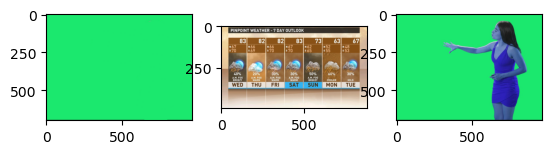

In [2]:
background_image = cv2.imread('./data/background.png',1)
FakeBackground_image = cv2.imread('./data/FakeBackground.png',1)
observed_image = cv2.imread('./data/StillImage.png',1)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(background_image)
ax2.imshow(FakeBackground_image)
ax3.imshow(observed_image)
plt.show()

(480, 640, 3)
(480, 640, 3)


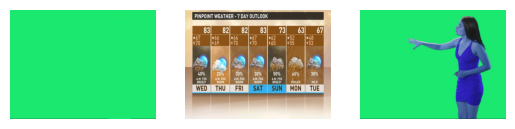

In [3]:
new_size = (640,480)
background_image = cv2.resize(background_image,(640,480))
print(background_image.shape)
FakeBackground_image = cv2.resize(FakeBackground_image,new_size)
print(FakeBackground_image.shape)
observed_image = cv2.resize(observed_image,new_size)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(background_image)
ax1.set_axis_off()
ax2.imshow(FakeBackground_image)
ax2.set_axis_off()
ax3.imshow(observed_image)
ax3.set_axis_off()
plt.show()

(480, 640)


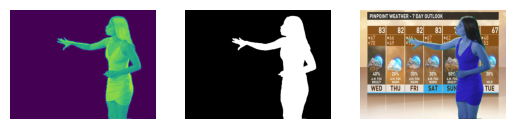

In [4]:
def computeDifference(background_img,input_img):
    difference_three_channel = cv2.absdiff(background_img,input_img)
    difference_single_channel = np.sum(difference_three_channel,axis=2)/3
    difference_single_channel = difference_single_channel.astype('uint8')
    return difference_single_channel
def computeBinaryMask(difference_single_channel,thresh=15):
    a,difference_binary = cv2.threshold(difference_single_channel,thresh,255,cv2.THRESH_BINARY)
    difference_binary =  np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

def replaceBackGround(bg1_image, bg2_image, ob_image):
    difference_single_channel = computeDifference(bg1_image,ob_image)
    binary_mask = computeBinaryMask(difference_single_channel,20)
    output = np.where(binary_mask==255, ob_image, bg2_image)
    return output
difference_single_channel = computeDifference(background_image,observed_image)
cv2.imwrite('difference_single_channel.png',difference_single_channel)
print(difference_single_channel.shape)
# print(difference_single_channel.shape)
difference_binary = computeBinaryMask(difference_single_channel)
cv2.imwrite('difference_binary.png',difference_binary)
# print(difference_binary.shape)
output = replaceBackGround(background_image, FakeBackground_image, observed_image)
cv2.imwrite('output.png',output)


fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(difference_single_channel)
ax1.set_axis_off()
ax2.imshow(difference_binary)
ax2.set_axis_off()
ax3.imshow(output)
ax3.set_axis_off()
plt.show()

In [5]:
a = np.array([[1,2],[3,4],[5,6]])
b = np.array([[8,9],[9,10],[11,12]])
print(a.shape)
print(b.shape)
c = np.stack((a,)*3, axis=-1)
print(c.shape)
print(c)
print(a[1,1])
print(c[1,1,0])

(3, 2)
(3, 2)
(3, 2, 3)
[[[1 1 1]
  [2 2 2]]

 [[3 3 3]
  [4 4 4]]

 [[5 5 5]
  [6 6 6]]]
4
4


In [8]:
cap = cv2.VideoCapture(0)
_, first_frame = cap.read()
print("first_frame",first_frame.shape)
first_frame = cv2.GaussianBlur(first_frame,(5,5),0)
cv2.imshow('window-title',first_frame)
cv2.waitKey(0)
# get live video 
while(True):
    _, frame = cap.read()
    frame = cv2.GaussianBlur(frame,(5,5),0)
    difference = cv2.absdiff(first_frame,frame)
    difference = np.sum(difference,axis=2)/3.0
    _, difference = cv2.threshold(difference,15,255,cv2.THRESH_BINARY)
    diff3 = np.stack((difference,)*3,axis=-1)
    output = np.where(diff3==0,FakeBackground_image,frame)
    cv2.imshow("First frame",first_frame)
    cv2.imshow("Frame",frame)
    cv2.imshow("difference",difference)
    cv2.imshow("output",output)
    key = cv2.waitKey(30)
    if key == 27:
        break
cv2.waitKey(0)
cv2.destroyWindow()
cap.release

first_frame (480, 640, 3)


TypeError: destroyWindow() missing required argument 'winname' (pos 1)